In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df =pd.read_csv("C:\\Users\\Administrator\\Desktop\\projects from pc\\Page View Time data (1).csv")
df.set_index('date',inplace=True)
df.index = pd.to_datetime(df.index)
df = df[(df['value']>=df['value'].quantile(0.025))&(df['value']<=df['value'].quantile(0.975))]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [4]:
df = df[(df['value']>=df['value'].quantile(0.025))&(df['value']<=df['value'].quantile(0.975))]

In [5]:
def draw_line_plot():
    fig , ax =plt.subplots(figsize=(20,8),dpi=100)
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    sns.lineplot(data=df,x='date',y='value',color='red')
    fig.savefig('line_plot.png')
    return fig
 

In [6]:
def draw_bar_plot():
    
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month_name()
    df_bar = pd.DataFrame(df_bar.groupby(by=['year','month'],sort=False)['value'].mean().round(2).astype(int))
    df_bar = df_bar.reset_index()
    missing_data = {
        "year": [2016, 2016, 2016, 2016],
        "month": ['January', 'February', 'March', 'April'],
        "value": [0, 0, 0, 0]}
    df_bar = pd.concat([pd.DataFrame(missing_data),df_bar])
    fig, ax = plt.subplots(figsize=(25, 10), dpi=100)
    ax.set_title("Daily freeCodeCamp Forum Average Page Views per Month")

    chart = sns.barplot(data=df_bar, x='year', y="value", hue="month", palette="tab10")
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='center')

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')


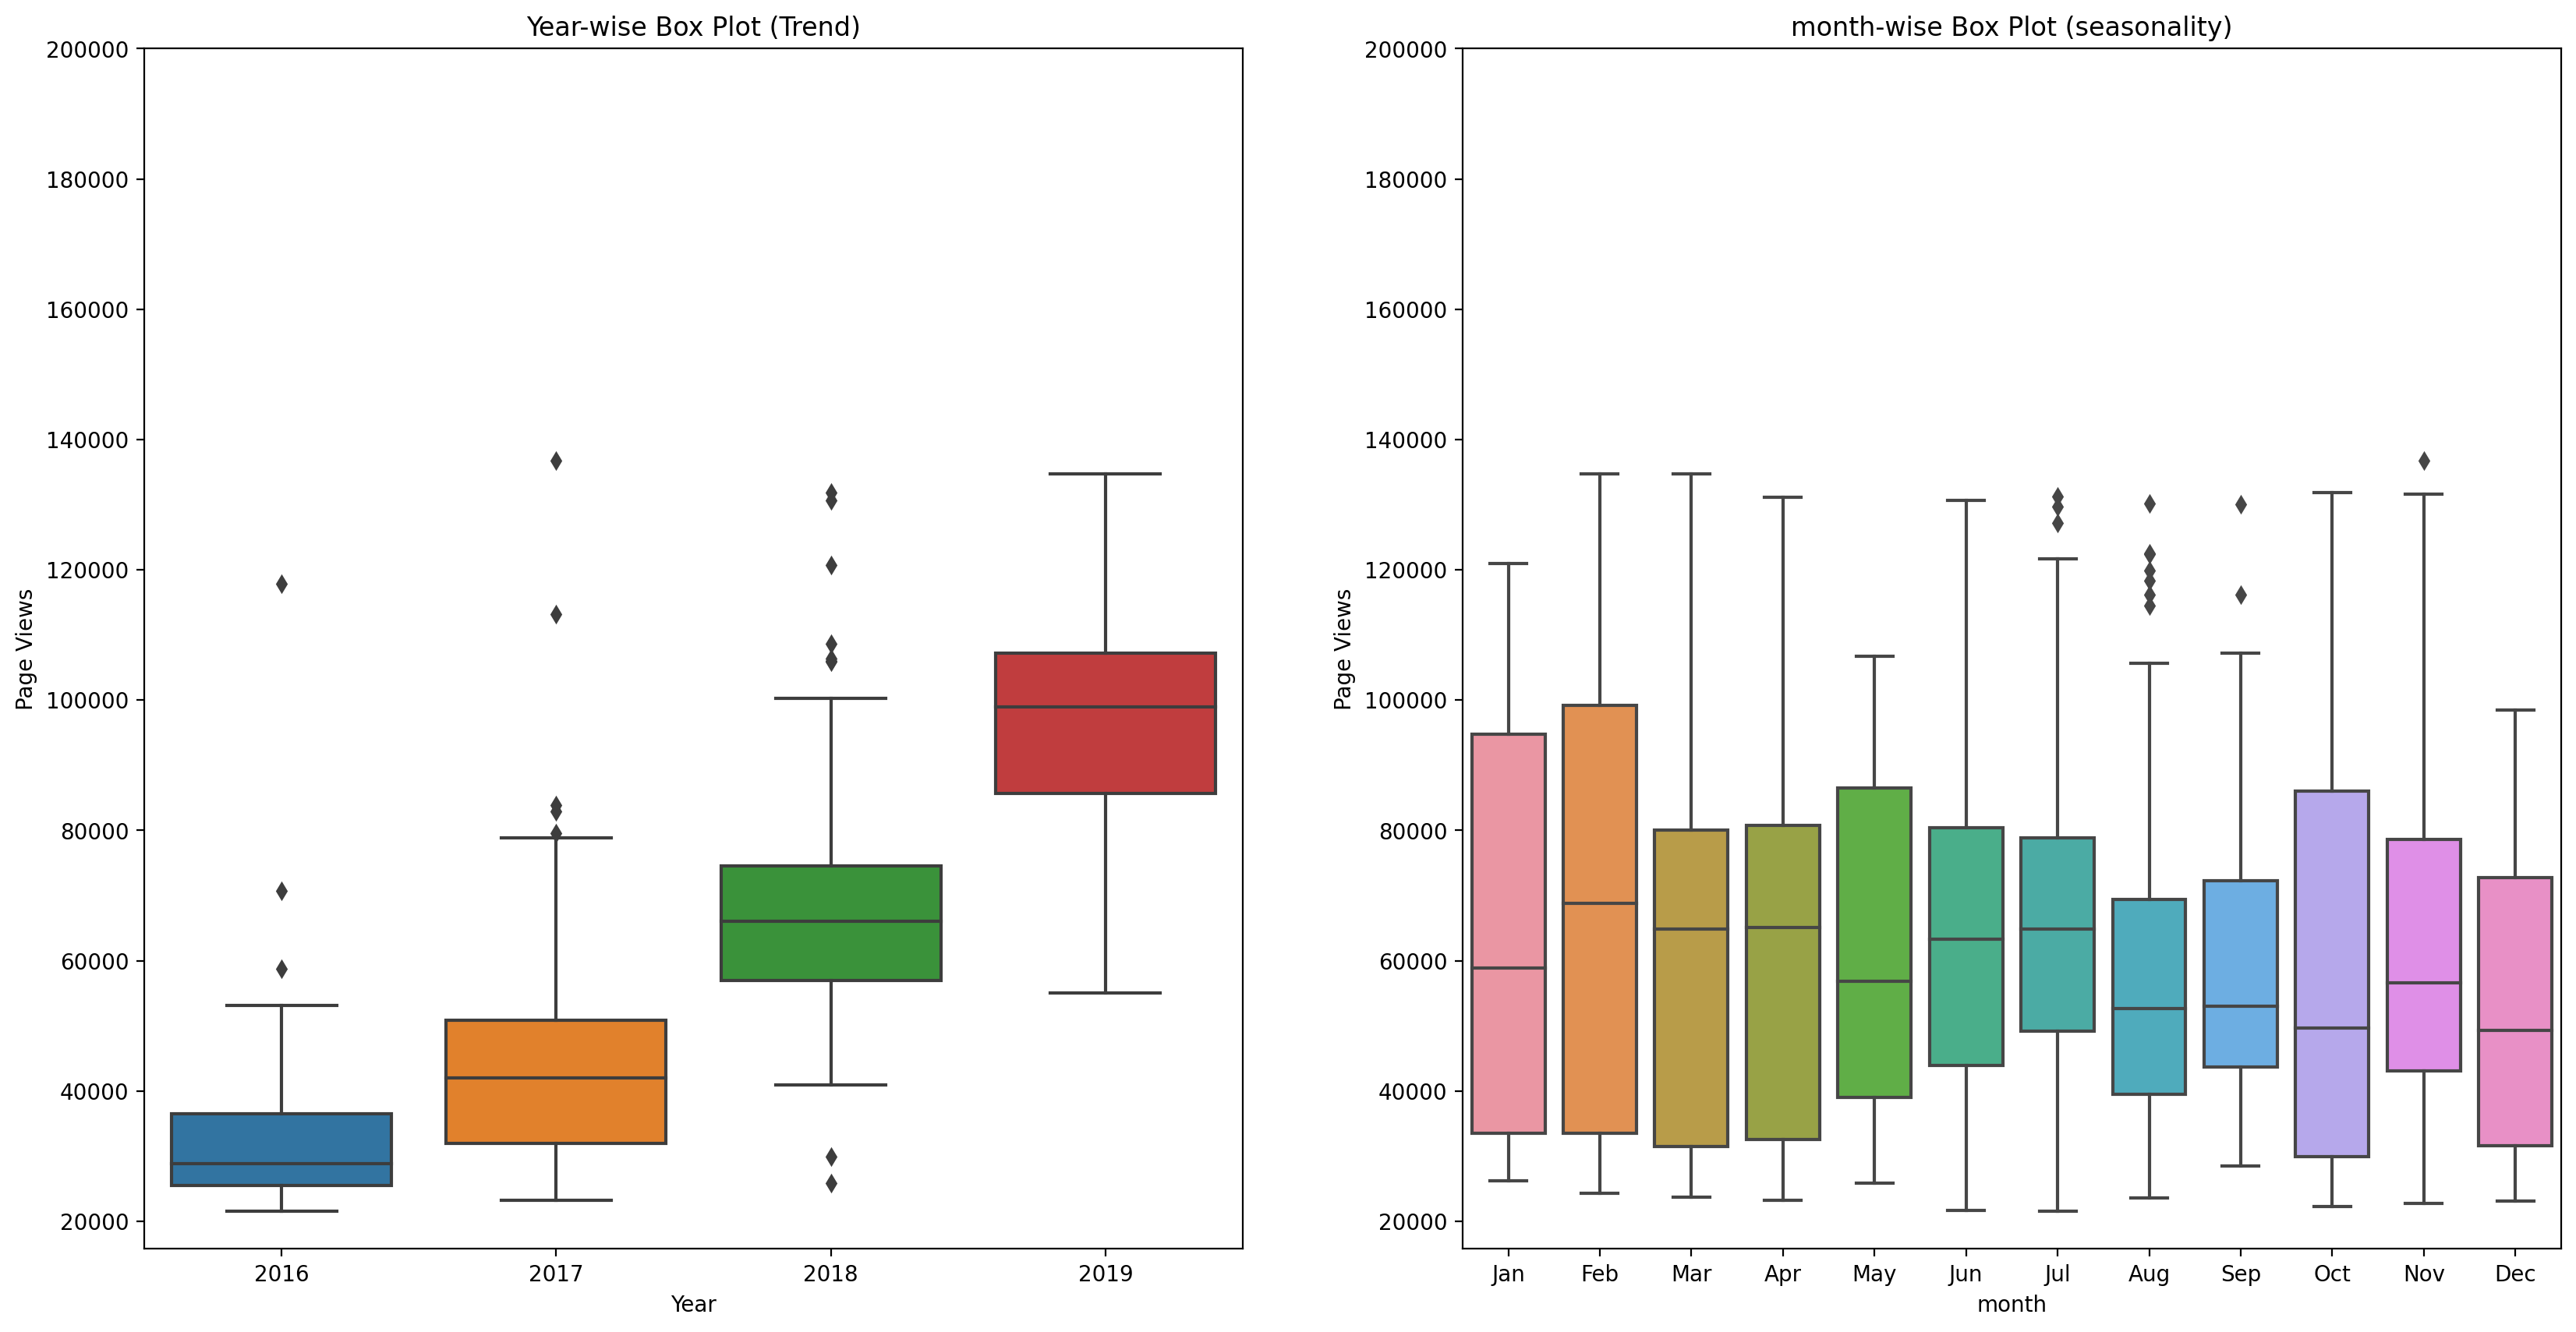

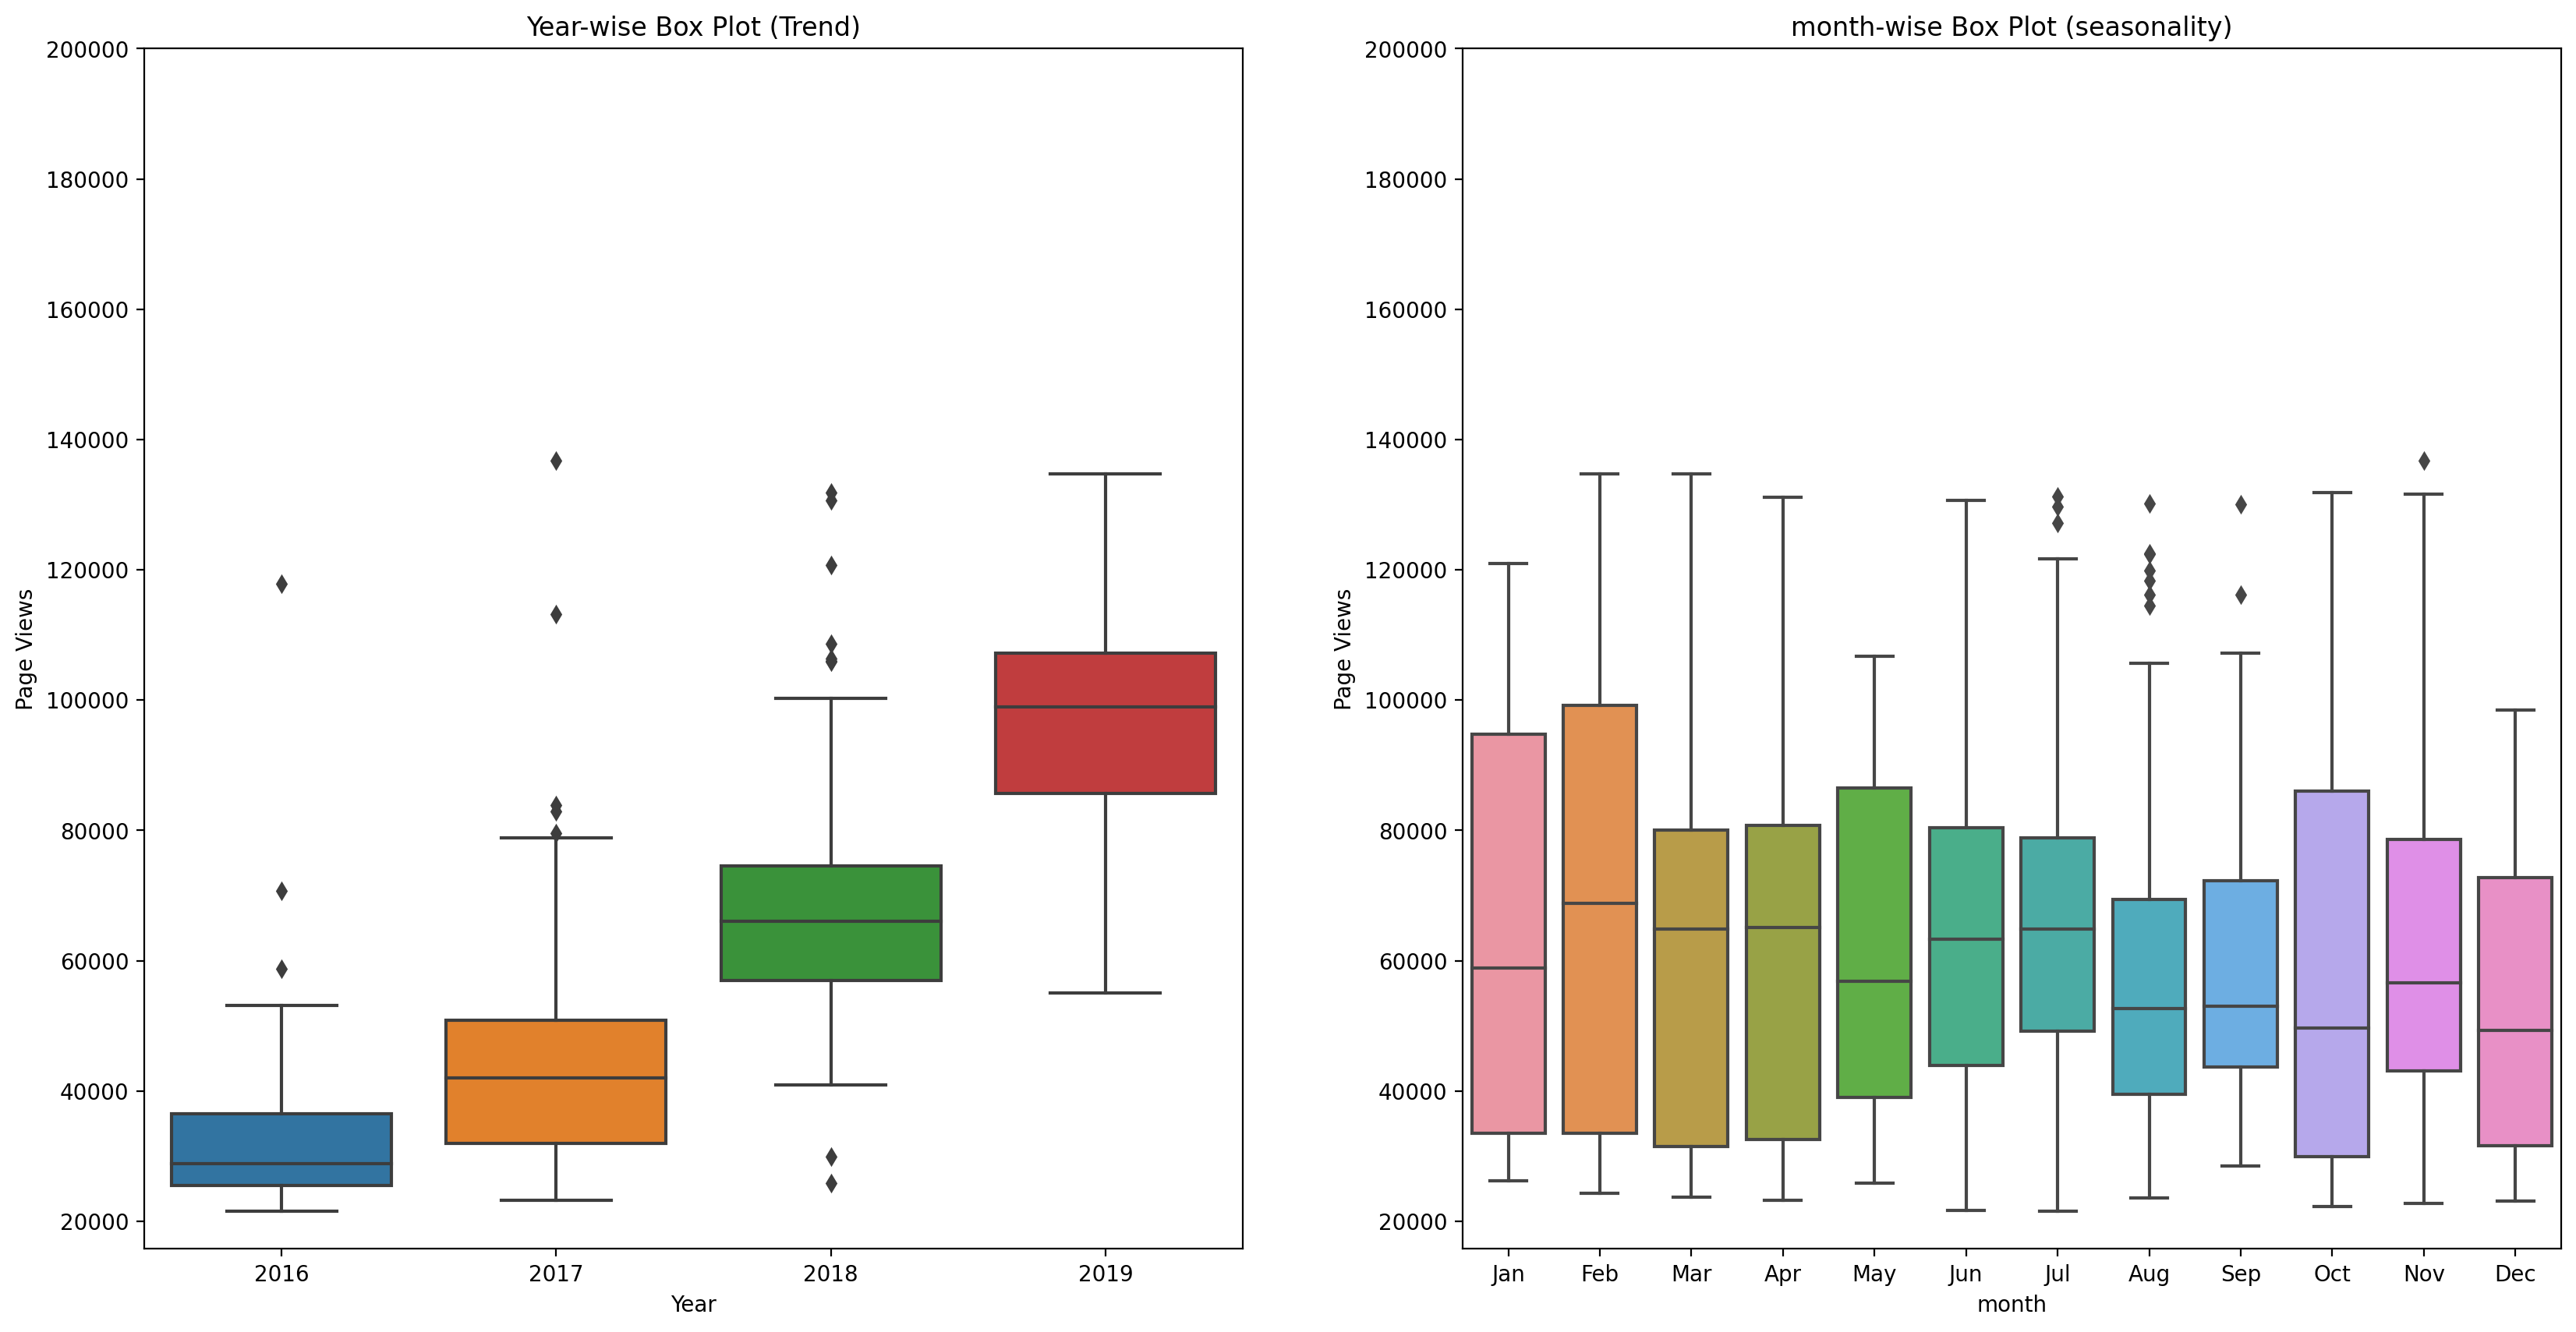

In [14]:
def draw_box_plot():
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    fig , ax =plt.subplots(1,2,figsize=(20,10),dpi=200)
    sns.boxplot(data=df_box,x='year',y='value',ax=ax[0])
    ax[0].set_title("Year-wise Box Plot (Trend)")
    ax[0].set_xlabel("Year")
    ax[0].set_ylabel("Page Views")#sns.boxplot(data=df_box,x='year',y='value')
    ax[0].set_yticks([20000,40000,60000,80000,100000,120000,140000,160000,180000,200000])
    month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    sns.boxplot(df_box,x='month',y='value',order=month_order,ax=ax[1])
    ax[1].set_title("month-wise Box Plot (seasonality)")
    ax[1].set_xlabel("month")
    ax[1].set_ylabel("Page Views")#sns.boxplot(data=df_box,x='year',y='value')
    ax[1].set_yticks([20000,40000,60000,80000,100000,120000,140000,160000,180000,200000])
    return fig
draw_box_plot()